In [47]:
import numpy as np
import matplotlib.pyplot as plt

- Схема обучения нейронки
    - Forward propagation - вычислить предсказание
    - Loss function - вычислить ошибку
    - Backward propagation - найти градиенты (веса которые ошиблись)
    - Gradient descent - обновить веса
    - Повторить много раз

In [48]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_grad(a):
    return a * (1 - a)


def relu(z):
    return np.maximum(0, z)


def relu_grad(z):
    return (z > 0).astype(float)

$$
ReLU(x) = max(0, x)
$$

$$
\sigma(x) = \frac {1}{1+e^{-x}}
$$

In [49]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [50]:
np.random.seed(0)

hidden_size = 4
# He initialization - W ~ N(0, sqrt(2 / n))
W1 = np.random.randn(2, hidden_size) * np.sqrt(2.0 / 2)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, 1) * np.sqrt(2.0 / hidden_size)
b2 = np.zeros((1, 1))

lr = 0.1

### Forward propagation
$$
Z_1 = XW_1 + b_1
A_1 = ReLU(Z_1)
$$

$$
Z_2 = A_1W_2 + b_2
A_2 = sigmoid(Z_2)
$$

In [51]:
def forward(X, W1, b1, W2, b2):
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

In [52]:
def backward(X, y, Z1, A1,  A2, W2):
    m = len(X)

    dZ2 = A2 - y
    dW2 = A1.T @ dZ2 / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_grad(Z1)
    dW1 = X.T @ dZ1 / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2


In [53]:
loses = []

for epoch in range(5000):
    Z1, A1, Z2, A2 = forward(X, W1, b1, W2, b2)

    loss = -np.mean(y * np.log(A2+1e-8) + (1-y)*np.log(1-A2 + 1e-8))
    loses.append(loss)

    dW1, db1, dW2, db2 = backward(X, y, Z1, A1, A2, W2)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if ((epoch+1) % 500) == 0:
        predictions = (A2 > 0.5).astype(int).ravel()
        print(f"Epoch: {epoch+1} Loss: {loss:.4f} Predictions: {predictions}")

print("Ready")


Epoch: 500 Loss: 0.2397 Predictions: [0 1 1 0]
Epoch: 1000 Loss: 0.0261 Predictions: [0 1 1 0]
Epoch: 1500 Loss: 0.0104 Predictions: [0 1 1 0]
Epoch: 2000 Loss: 0.0061 Predictions: [0 1 1 0]
Epoch: 2500 Loss: 0.0042 Predictions: [0 1 1 0]
Epoch: 3000 Loss: 0.0031 Predictions: [0 1 1 0]
Epoch: 3500 Loss: 0.0025 Predictions: [0 1 1 0]
Epoch: 4000 Loss: 0.0020 Predictions: [0 1 1 0]
Epoch: 4500 Loss: 0.0017 Predictions: [0 1 1 0]
Epoch: 5000 Loss: 0.0015 Predictions: [0 1 1 0]
Ready


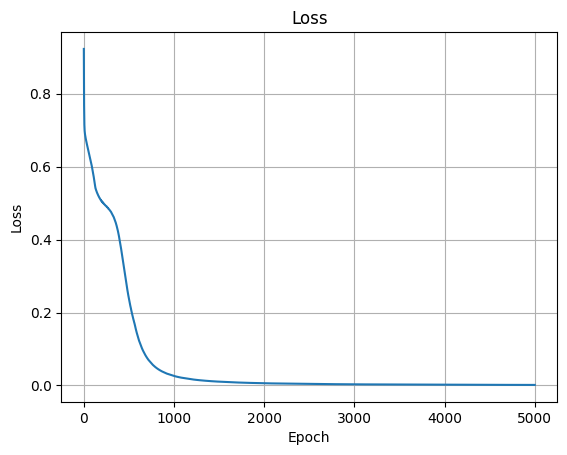

In [54]:
plt.plot(loses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [55]:
Z1, A1, Z2, A2 = forward(X, W1, b1, W2, b2)
print(A2.ravel())
print((A2 > 0.5).astype(int).ravel())

[2.74138057e-03 9.98610439e-01 9.99030597e-01 8.28476987e-04]
[0 1 1 0]
